In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
import pickle

## 05a Model Pickling :

This notebook is for isolating the chosen model with the best parameters determined from 05_GridSearch_HyperparameterTuning for pickling purposes to upload to 06_Implementation and Streamlit

In [3]:
data_set = '../data/03_data_post_EDA.csv'

df = pd.read_csv(data_set)

In [5]:
df.head()

,comment_id,parent_id,post_id,is_submitter,body,score,stickied,created_utc,post_title,subreddit,body_cleaned,body_cleaned_lemmatized,comment_length,sentiment_score,emotional_tone
0,gbgsbi4,t3_jptqj9,t3_jptqj9,False,"As you all celebrate or commiserate, please he...",1,True,2020-11-07 16:40:49,Joe Biden elected president of the United States,news,celebrate commiserate please help us reporting...,celebrate commiserate please help u reporting ...,138,0.15,Neutral
1,gbhfdv2,t3_jptqj9,t3_jptqj9,False,"Congratulations USA! From Brazil, I hope Bolso...",172,False,2020-11-07 19:49:52,Joe Biden elected president of the United States,news,Congratulations USA Brazil hope Bolsonaro next...,congratulation usa brazil hope bolsonaro next ...,12,0.00,Neutral
2,gbgt3me,t3_jptqj9,t3_jptqj9,False,"Fox News just called it a couple minutes ago, ...",8749,False,2020-11-07 16:46:18,Joe Biden elected president of the United States,news,Fox News called couple minutes ago know real,fox news call couple minute ago know real,14,0.20,Neutral
3,gbgvvs7,t3_jptqj9,t3_jptqj9,False,"""You were expecting Nevada to decide the elect...",16552,False,2020-11-07 17:09:05,Joe Biden elected president of the United States,news,You expecting Nevada decide election ME PENNSY...,you expect nevada decide election me pennsylvania,13,0.00,Neutral
4,gbgr8hw,t3_jptqj9,t3_jptqj9,False,"Is it 100% confirmed, as in nothing can take t...",3176,False,2020-11-07 16:32:37,Joe Biden elected president of the United States,news,100 confirmed nothing take away,100 confirm nothing take away,11,0.40,Positive


In [6]:
df['subreddit_binary'] = df['subreddit'].map({'TheOnion': 1, 'news': 0})

In [7]:
df[['subreddit_binary','subreddit']]

,subreddit_binary,subreddit
0,0,news
1,0,news
2,0,news
3,0,news
4,0,news
...,...,...
37914,1,TheOnion
37915,1,TheOnion
37916,1,TheOnion
37917,1,TheOnion


In [8]:
df.isnull().sum()

comment_id                   0
parent_id                    0
post_id                      0
is_submitter                 0
body                         0
score                        0
stickied                     0
created_utc                  0
post_title                   0
subreddit                    0
body_cleaned               140
body_cleaned_lemmatized    154
comment_length               0
sentiment_score              0
emotional_tone               0
subreddit_binary             0
dtype: int64

In [9]:
df = df.dropna(subset=['body_cleaned_lemmatized'])
df.isnull().sum()

comment_id                 0
parent_id                  0
post_id                    0
is_submitter               0
body                       0
score                      0
stickied                   0
created_utc                0
post_title                 0
subreddit                  0
body_cleaned               0
body_cleaned_lemmatized    0
comment_length             0
sentiment_score            0
emotional_tone             0
subreddit_binary           0
dtype: int64

Transformation of data using CountVectorizer with best parameters listed below:

In [10]:
cvec = CountVectorizer(max_df=0.9,max_features= 7500,min_df=1,ngram_range=(1,1),stop_words='english',)

X = cvec.fit_transform(df['body_cleaned_lemmatized'])
y = df['subreddit_binary']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

Instantiating of Logistic Regression model with best parameters listed below, alongside measurements of scoring values to ensure consistent results as 05_GridSearch_HyperparameterTuning

Accuracy: 0.8307957103137826
Sensitivity: 0.8460241640910368
f1_score: 0.824931506849315


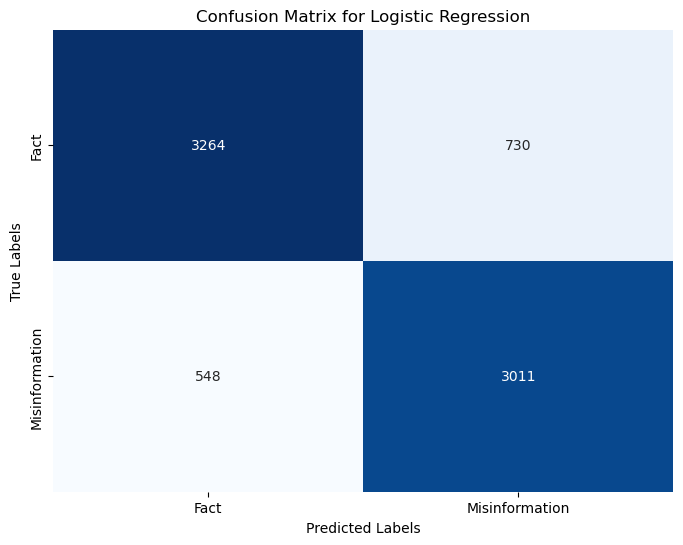

In [13]:


# Initialize and train the logistic regression model
logistic_regression = LogisticRegression(solver='liblinear', max_iter= 2000,C=1.0,class_weight='balanced',
                                        penalty= 'l1')
logistic_regression.fit(X_train, y_train)


# Predict labels for the test set
y_pred_lr = logistic_regression.predict(X_test)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", accuracy_lr)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_lr).ravel()

print('Precision', tp/(tp+fp))
print('Sensitivity:' , tp / (tp+fn))
print('f1_score:', 2*tp / (2*tp + fp + fn))

cm_lr = confusion_matrix(y_test, y_pred_lr)

# Define class labels
class_labels = [ 'Fact','Misinformation']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(ticks=np.arange(len(class_labels)) + 0.5, labels=class_labels)
plt.yticks(ticks=np.arange(len(class_labels)) + 0.5, labels=class_labels)
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


## Pickling of Desired Model

In [14]:
# Pickle the CountVectorizer
with open("count_vectorizer.pkl", "wb") as f:
    pickle.dump(cvec, f)

# Pickle the model
with open("model.pkl", "wb") as f:
    pickle.dump(logistic_regression, f)